# Analísis de los datos sobre la diabetes
Actividad: Lectura Datos Diabetes  
Carlos Villegas Martínez - A00842665  
Carrera: IDM  

In [16]:
#importa librerías
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import sklearn

# Descripción de Variables

pregnancies Pregnancies: Cuantitativa Discreta   
glucose Glucose level: Cuantitativa Continua    
bloodpressure Blood pressure: Cuantitativa Continua    
outcome (0 = NO; 1 = YES) Diabetes: Categorica Nominal  

**Ejemplo:** Crear un objeto DataFrame con base en un archivo .csv

In [5]:
#lee archivo csv
diabetes_data = pd.read_csv("diabetes.csv")

In [4]:
#Usa función shape para revisar el total de renglones y columnas
diabetes_data.shape

(768, 9)

In [5]:
#Revisa los primeros 5 renglones del dataset usando la función head()
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
#Revisa los últimos 5 renglones del dataset usando la función tail()
diabetes_data.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [7]:
#Revisa la información mas completa del conjunto de datos usando la función info()
#Muestra el total de datos, las columnas y su tipo correspondiente, dice si contiene nulos o no
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
#revisa cuántos valores únicos tiene cada atributo del archivo usando la función nunique()
diabetes_data.nunique()

Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64

## Exploración de Datos

No se exploraron datos para Outcome porque solo contiene 0 y 1

In [15]:
#utiliza la función describe() para obtener estadística básica. se puede incluir -0
diabetes_data["Pregnancies"].describe()

count    768.000000
mean       3.845052
std        3.369578
min        0.000000
25%        1.000000
50%        3.000000
75%        6.000000
max       17.000000
Name: Pregnancies, dtype: float64

min = 0  
max = 17

In [16]:
diabetes_data["Glucose"].describe()

count    768.000000
mean     120.894531
std       31.972618
min        0.000000
25%       99.000000
50%      117.000000
75%      140.250000
max      199.000000
Name: Glucose, dtype: float64

min = 0  
max = 199

In [17]:
diabetes_data["BloodPressure"].describe()

count    768.000000
mean      69.105469
std       19.355807
min        0.000000
25%       62.000000
50%       72.000000
75%       80.000000
max      122.000000
Name: BloodPressure, dtype: float64

min = 0  
max = 122

In [18]:
#Revisa Valores nulos con funcion isnull().sum()
diabetes_data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [22]:
#Revisar valores únicos por columna usando función unique(): nombre-columna.unique()
diabetes_data["Pregnancies"].unique()

array([ 6,  1,  8,  0,  5,  3, 10,  2,  4,  7,  9, 11, 13, 15, 17, 12, 14])

In [23]:
diabetes_data["Glucose"].unique()

array([148,  85, 183,  89, 137, 116,  78, 115, 197, 125, 110, 168, 139,
       189, 166, 100, 118, 107, 103, 126,  99, 196, 119, 143, 147,  97,
       145, 117, 109, 158,  88,  92, 122, 138, 102,  90, 111, 180, 133,
       106, 171, 159, 146,  71, 105, 101, 176, 150,  73, 187,  84,  44,
       141, 114,  95, 129,  79,   0,  62, 131, 112, 113,  74,  83, 136,
        80, 123,  81, 134, 142, 144,  93, 163, 151,  96, 155,  76, 160,
       124, 162, 132, 120, 173, 170, 128, 108, 154,  57, 156, 153, 188,
       152, 104,  87,  75, 179, 130, 194, 181, 135, 184, 140, 177, 164,
        91, 165,  86, 193, 191, 161, 167,  77, 182, 157, 178,  61,  98,
       127,  82,  72, 172,  94, 175, 195,  68, 186, 198, 121,  67, 174,
       199,  56, 169, 149,  65, 190])

In [24]:
diabetes_data["BloodPressure"].unique()

array([ 72,  66,  64,  40,  74,  50,   0,  70,  96,  92,  80,  60,  84,
        30,  88,  90,  94,  76,  82,  75,  58,  78,  68, 110,  56,  62,
        85,  86,  48,  44,  65, 108,  55, 122,  54,  52,  98, 104,  95,
        46, 102, 100,  61,  24,  38, 106, 114])

## Variables Cuantitativas

### Medidas de tendencia central


No se generaron medidas de tendencia central para Outcome porque solo contiene 0 y 1

In [25]:
#Pregnancies
mean_age = diabetes_data['Pregnancies'].mean()
median_age =diabetes_data['Pregnancies'].median()
mode_age = diabetes_data['Pregnancies'].mode()
print("Mean_pregnancies:",mean_age)
print("Median_pregnancies:",median_age)
print("Mode_pregnancies:",mode_age)

Mean_pregnancies: 3.8450520833333335
Median_pregnancies: 3.0
Mode_pregnancies: 0    1
Name: Pregnancies, dtype: int64


Conclusiones:  
La media de embarazos fue 3.845, o alrededor de 4  
La mediana fue 3  
La moda fue de 1  

In [27]:
#Glucose
mean_age = diabetes_data['Glucose'].mean()
median_age =diabetes_data['Glucose'].median()
mode_age = diabetes_data['Glucose'].mode()
print("Mean_glucose:",mean_age)
print("Median_glucose:",median_age)
print("Mode_glucose:",mode_age)

Mean_glucose: 120.89453125
Median_glucose: 117.0
Mode_glucose: 0     99
1    100
Name: Glucose, dtype: int64


Conclusiones:  
La media de glucosa fue 120.8945  
La mediana fue 117  
La moda fue de 99  

In [28]:
#Blood Pressure
mean_age = diabetes_data['BloodPressure'].mean()
median_age =diabetes_data['BloodPressure'].median()
mode_age = diabetes_data['BloodPressure'].mode()
print("Mean_bp:",mean_age)
print("Median_bp:",median_age)
print("Mode_bp:",mode_age)

Mean_bp: 69.10546875
Median_bp: 72.0
Mode_bp: 0    70
Name: BloodPressure, dtype: int64


Conclusiones:  
La media de presion arterial fue 69.1055  
La mediana fue de 72  
La moda fue 70

# Variables Categóricas

In [29]:
diabetes_data['Pregnancies'].value_counts()

Pregnancies
1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
15      1
17      1
Name: count, dtype: int64

In [30]:
#Revisa conteo de varias columnas
diabetes_data['Glucose'].value_counts()

Glucose
99     17
100    17
111    14
129    14
125    14
       ..
191     1
177     1
44      1
62      1
190     1
Name: count, Length: 136, dtype: int64

In [31]:
diabetes_data['BloodPressure'].value_counts()

BloodPressure
70     57
74     52
78     45
68     45
72     44
64     43
80     40
76     39
60     37
0      35
62     34
66     30
82     30
88     25
84     23
90     22
86     21
58     21
50     13
56     12
52     11
54     11
75      8
92      8
65      7
85      6
94      6
48      5
96      4
44      4
100     3
106     3
98      3
110     3
55      2
108     2
104     2
46      2
30      2
122     1
95      1
102     1
61      1
24      1
38      1
40      1
114     1
Name: count, dtype: int64

In [32]:
diabetes_data['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [7]:
# Crear nueva columna
diabetes_data["GL & BP"] = diabetes_data["Glucose"] + diabetes_data["BloodPressure"]

In [42]:
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,GL & BP
0,6,148,72,35,0,33.6,0.627,50,1,220
1,1,85,66,29,0,26.6,0.351,31,0,151
2,8,183,64,0,0,23.3,0.672,32,1,247
3,1,89,66,23,94,28.1,0.167,21,0,155
4,0,137,40,35,168,43.1,2.288,33,1,177


Hice una columna que suma el nivel de glucosa con la presión arterial. Me parecio relevante crear esta variable porque tal vez podemos crear conclusiónes de acuerdo al total de ambos valores (eg. Puedo sacar la media de GL & BP y luego comparar valores mayores a la media para ver si se relaciona con la diabetes)

## Consulta

In [25]:
# df.iloc[i]: Accede a la fila en la posición i.
# Acceder a la primera fila
diabetes_data.iloc[0]

Pregnancies                     6
Glucose                       148
BloodPressure                  72
SkinThickness                  35
Insulin                         0
BMI                          33.6
DiabetesPedigreeFunction    0.627
Age                            50
Outcome                         1
GL & BP                       220
risk_factor                  High
Name: 0, dtype: object

In [26]:
# Acceder a las dos primeras filas
diabetes_data.iloc[0:2]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,GL & BP,risk_factor
0,6,148,72,35,0,33.6,0.627,50,1,220,High
1,1,85,66,29,0,26.6,0.351,31,0,151,Other


In [27]:
diabetes_data["GL & BP"].describe()

count    768.000000
mean     190.000000
std       39.821571
min       48.000000
25%      164.750000
50%      187.000000
75%      217.000000
max      299.000000
Name: GL & BP, dtype: float64

In [28]:
#Medir riezgos de salud de acuerdo a la nueva columna GL & BP
diabetes_data["risk_factor"] = np.where(diabetes_data["GL & BP"] > 190, "High", "Other")

In [21]:
diabetes_data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,GL & BP,risk_factor
0,6,148,72,35,0,33.6,0.627,50,1,220,High
1,1,85,66,29,0,26.6,0.351,31,0,151,Other
2,8,183,64,0,0,23.3,0.672,32,1,247,High
3,1,89,66,23,94,28.1,0.167,21,0,155,Other
4,0,137,40,35,168,43.1,2.288,33,1,177,Other
...,...,...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0,177,Other
764,2,122,70,27,0,36.8,0.340,27,0,192,High
765,5,121,72,23,112,26.2,0.245,30,0,193,High
766,1,126,60,0,0,30.1,0.349,47,1,186,Other


In [24]:
#Subconjunto solamente con las variables que se me asignaron y las que agregue
analisis = diabetes_data[["Pregnancies","Glucose","BloodPressure","GL & BP","Outcome","risk_factor"]]

In [23]:
analisis

,Pregnancies,Glucose,BloodPressure,GL & BP,Outcome,risk_factor
0,6,148,72,220,1,High
1,1,85,66,151,0,Other
2,8,183,64,247,1,High
3,1,89,66,155,0,Other
4,0,137,40,177,1,Other
...,...,...,...,...,...,...
763,10,101,76,177,0,Other
764,2,122,70,192,0,High
765,5,121,72,193,0,High
766,1,126,60,186,1,Other


In [30]:
#ordenar usando funcion sort_values(by=atributo, ascending=True/false)
analisis.sort_values(by="GL & BP",ascending=False)

,Pregnancies,Glucose,BloodPressure,GL & BP,Outcome,risk_factor
549,4,189,110,299,0,High
440,0,189,104,293,1,High
22,7,196,90,286,1,High
759,6,190,92,282,1,High
43,9,171,110,281,1,High
...,...,...,...,...,...,...
81,2,74,0,74,0,Other
589,0,73,0,73,0,Other
502,6,0,68,68,1,Other
342,1,0,68,68,0,Other


In [31]:
#Agrupar por un atributo y calcular función de agregación utilizando groupby(atributo)['atributoAgregacion].funcion() (ej. mean() para promedio)
analisis.groupby("Outcome")["GL & BP"].mean()

Outcome
0    178.16400
1    212.08209
Name: GL & BP, dtype: float64

In [32]:
#Gente con altos riezgos de salud
diabetes_data[diabetes_data["risk_factor"] == "High"]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,GL & BP,risk_factor
0,6,148,72,35,0,33.6,0.627,50,1,220,High
2,8,183,64,0,0,23.3,0.672,32,1,247,High
8,2,197,70,45,543,30.5,0.158,53,1,267,High
9,8,125,96,0,0,0.0,0.232,54,1,221,High
10,4,110,92,0,0,37.6,0.191,30,0,202,High
...,...,...,...,...,...,...,...,...,...,...,...
757,0,123,72,0,0,36.3,0.258,52,1,195,High
759,6,190,92,0,0,35.5,0.278,66,1,282,High
761,9,170,74,31,0,44.0,0.403,43,1,244,High
764,2,122,70,27,0,36.8,0.340,27,0,192,High


In [33]:
# Mas embarazos que la media 
diabetes_data[diabetes_data["Pregnancies"] > 4]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,GL & BP,risk_factor
0,6,148,72,35,0,33.6,0.627,50,1,220,High
2,8,183,64,0,0,23.3,0.672,32,1,247,High
5,5,116,74,0,0,25.6,0.201,30,0,190,Other
7,10,115,0,0,0,35.3,0.134,29,0,115,Other
9,8,125,96,0,0,0.0,0.232,54,1,221,High
...,...,...,...,...,...,...,...,...,...,...,...
759,6,190,92,0,0,35.5,0.278,66,1,282,High
761,9,170,74,31,0,44.0,0.403,43,1,244,High
762,9,89,62,0,0,22.5,0.142,33,0,151,Other
763,10,101,76,48,180,32.9,0.171,63,0,177,Other


In [34]:
# Alto nivel de glucosa
diabetes_data[diabetes_data["Glucose"] > 117]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,GL & BP,risk_factor
0,6,148,72,35,0,33.6,0.627,50,1,220,High
2,8,183,64,0,0,23.3,0.672,32,1,247,High
4,0,137,40,35,168,43.1,2.288,33,1,177,Other
8,2,197,70,45,543,30.5,0.158,53,1,267,High
9,8,125,96,0,0,0.0,0.232,54,1,221,High
...,...,...,...,...,...,...,...,...,...,...,...
759,6,190,92,0,0,35.5,0.278,66,1,282,High
761,9,170,74,31,0,44.0,0.403,43,1,244,High
764,2,122,70,27,0,36.8,0.340,27,0,192,High
765,5,121,72,23,112,26.2,0.245,30,0,193,High


## Graficas 

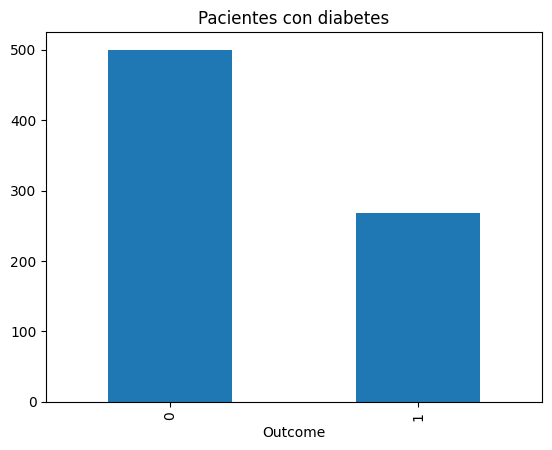

In [36]:
diabetes = diabetes_data['Outcome'].value_counts()
diabetes.plot(kind='bar')
plt.title('Pacientes con diabetes')
plt.show()

Grafica de barras en la cual comparamos la cantidad de gente con diabetes vs la cantidad de gente sin diabetes. 

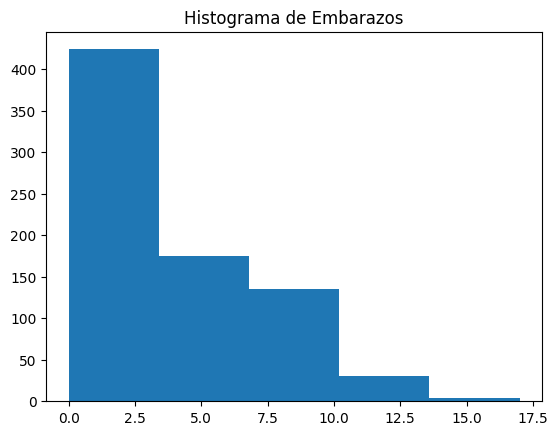

In [44]:
plt.hist(analisis['Pregnancies'], bins=5)
plt.title('Histograma de Embarazos')
plt.show()

El histograma presentado arriba nos ayuda a visualizar las tendencias de embarazos, donde los datos estan sesgados a la derecha. 

Text(0.5, 1.0, 'Boxplot de Embarazos')

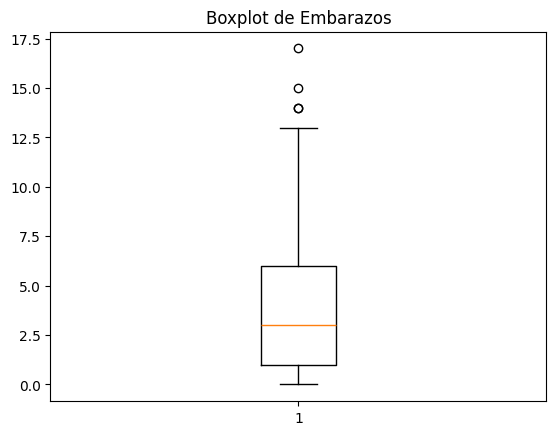

In [43]:
plt.boxplot(analisis['Pregnancies'])
plt.title('Boxplot de Embarazos')

Aqui tenemos un Boxplot que mapea la cantidad de embarazos. Podemos corroborar la información con los resultados de la exploración de datos, donde la media fue 3.845052, el minimo fue 0 y el maximo 17.

Text(0.5, 1.0, 'Diabetes vs GL & BP')

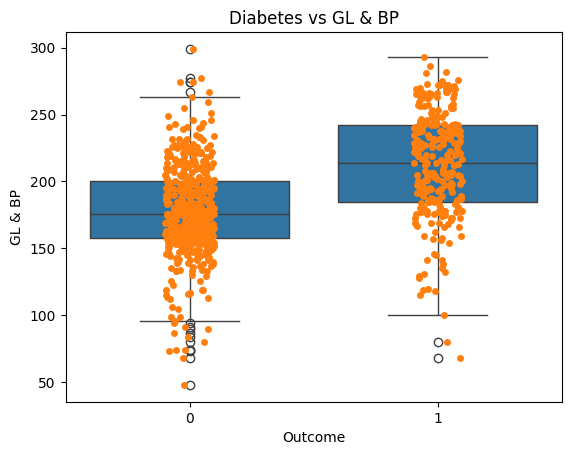

In [41]:
sns.boxplot(analisis, x="Outcome", y="GL & BP")
sns.stripplot(analisis, x="Outcome", y="GL & BP", edgecolor="auto" )
plt.title("Diabetes vs GL & BP")

Este boxplot compara GL & BP entre gente con diabetes y gente sin diabetes. Podemos corroborar los datos con los resultados en la sección de consulta, donde agrupamos GL & BP y calculamos la media para ambos Outcomes. Así, concluimos que la gente con diabetes tiende a contar con una cantidad mayor de GL & BP que la gente sin diabetes, a excepción de algunos casos outliers.  

## Matriz de correlación 

In [39]:
variables_numericas = analisis.select_dtypes(include='number')
matriz_correlacion = variables_numericas.corr().round(2)
matriz_correlacion

,Pregnancies,Glucose,BloodPressure,GL & BP,Outcome
Pregnancies,1.00,0.13,0.14,0.17,0.22
Glucose,0.13,1.00,0.15,0.88,0.47
BloodPressure,0.14,0.15,1.00,0.61,0.07
GL & BP,0.17,0.88,0.61,1.00,0.41
Outcome,0.22,0.47,0.07,0.41,1.00


Text(0.5, 1.0, 'Correlación entre características (Features)"')

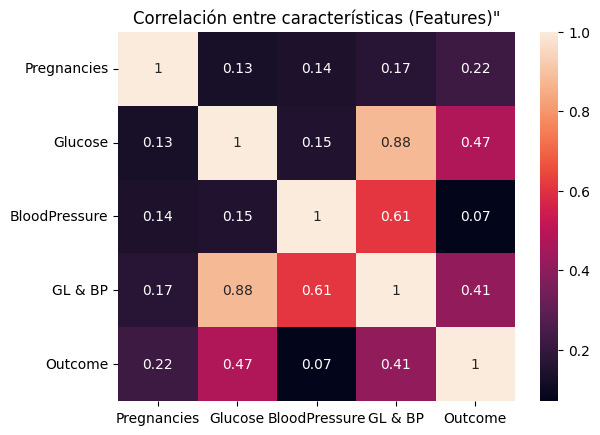

In [40]:
sns.heatmap(matriz_correlacion, annot=True)
plt.title('Correlación entre características (Features)"')

Dando un vistazo ha este mapa de calor, podemos identificar los tres factores principales que se relacionan con la diabetes. Primero, cabe mencionar que ninguna variable tuvo correlación negativa, y la unica con correlacion despreciable (o muy baja) fue la Presion Arterial. La variable con mayor correlación a la diabetes fue la glucosa (.47), seguida de la combinacion entre nivel de glucosa y presion arterial o GL & BP (.41), y por ultimo la tercer variable con mayor correlación fue la cantidad de embarazos (.22). 

## Para finalizar


No veo la necesidad de eliminar ninguna variable del analisis. Se puede argumentar en contra de la variable BloodPressure debido a su baja correlación, pero es necesaria para calcular GL & BP así que opte por mantenerla. 

In [47]:
analisis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Pregnancies    768 non-null    int64 
 1   Glucose        768 non-null    int64 
 2   BloodPressure  768 non-null    int64 
 3   GL & BP        768 non-null    int64 
 4   Outcome        768 non-null    int64 
 5   risk_factor    768 non-null    object
dtypes: int64(5), object(1)
memory usage: 36.1+ KB
